In [1]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
f1 = pd.read_csv('C:\\bj_pred_cyc.csv')
df_cyc = pd.DataFrame(f1)

In [3]:
f2 = pd.read_csv('C:\\bj_pred_dum.csv')
df_dum = pd.DataFrame(f2)

In [4]:
f3 = pd.read_csv('C:\\bj_pred_num.csv')
df_num = pd.DataFrame(f3)

In [5]:
df_cyc.head(5)

,Lasso Regression,Ridge Regression,Random Forest,Xtreme Gradient Boost,Support Vector Machine,Multi-Layer Perceptron,Target,date
0,23.928287,20.912284,23.830839,22.994114,22.544634,22.149696,53,2014-01-01 00:00:00
1,50.489133,47.293691,46.015968,49.501660,49.639339,47.203102,65,2014-01-01 01:00:00
2,61.202816,58.104643,63.321782,53.568580,60.824591,57.565396,70,2014-01-01 02:00:00
3,65.291686,62.112208,64.826801,52.928920,65.206438,61.679608,79,2014-01-01 03:00:00
4,83.064416,80.093961,69.609264,71.069430,79.988223,78.959366,92,2014-01-01 04:00:00


In [6]:
df_dum.head(5)

,Lasso Regression,Ridge Regression,Random Forest,Xtreme Gradient Boost,Support Vector Machine,Multi-Layer Perceptron,Target,date
0,21.993612,21.550740,22.204136,21.060860,21.773013,24.230729,53,2014-01-01 00:00:00
1,48.665261,44.364814,42.510473,47.933712,48.254700,46.811994,65,2014-01-01 01:00:00
2,59.701805,56.185336,63.332407,57.747093,59.689692,58.740119,70,2014-01-01 02:00:00
3,64.300365,59.842813,62.243863,61.164870,64.259676,62.116695,79,2014-01-01 03:00:00
4,79.201216,79.867590,66.506826,77.511116,78.950851,80.721358,92,2014-01-01 04:00:00


In [7]:
df_num.head(5)

,Lasso Regression,Ridge Regression,Random Forest,Xtreme Gradient Boost,Support Vector Machine,Multi-Layer Perceptron,Target,date
0,18.488514,17.351086,19.972342,21.456459,19.209170,16.857037,53,2014-01-01 00:00:00
1,46.048794,45.029041,47.968387,47.468090,46.515958,44.644628,65,2014-01-01 01:00:00
2,57.847540,57.005669,61.137143,55.642520,58.238624,56.746001,70,2014-01-01 02:00:00
3,62.804210,62.025148,64.505171,58.520320,63.103736,61.800719,79,2014-01-01 03:00:00
4,81.997775,80.874234,71.173769,78.263670,79.731851,80.665346,92,2014-01-01 04:00:00


# Select Predictions

In [8]:
df_cyc.drop(['Random Forest', 'Support Vector Machine'], axis=1, inplace=True)

In [9]:
df_dum.drop(['Random Forest', 'Support Vector Machine', 'Target'], axis=1, inplace=True)

In [10]:
df_num.drop(['Random Forest', 'Support Vector Machine', 'Target'], axis=1, inplace=True)

### Merging all predictions into single DF

In [11]:
df = pd.merge(df_cyc, df_dum, on=['date'])

In [12]:
df = pd.merge(df, df_num, on=['date'])

In [13]:
df['date'] = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

In [14]:
df.head(5)

,Lasso Regression_x,Ridge Regression_x,Xtreme Gradient Boost_x,Multi-Layer Perceptron_x,Target,Lasso Regression_y,Ridge Regression_y,Xtreme Gradient Boost_y,Multi-Layer Perceptron_y,Lasso Regression,Ridge Regression,Xtreme Gradient Boost,Multi-Layer Perceptron
date,,,,,,,,,,,,,
2014-01-01 00:00:00,23.928287,20.912284,22.994114,22.149696,53,21.993612,21.550740,21.060860,24.230729,18.488514,17.351086,21.456459,16.857037
2014-01-01 01:00:00,50.489133,47.293691,49.501660,47.203102,65,48.665261,44.364814,47.933712,46.811994,46.048794,45.029041,47.468090,44.644628
2014-01-01 02:00:00,61.202816,58.104643,53.568580,57.565396,70,59.701805,56.185336,57.747093,58.740119,57.847540,57.005669,55.642520,56.746001
2014-01-01 03:00:00,65.291686,62.112208,52.928920,61.679608,79,64.300365,59.842813,61.164870,62.116695,62.804210,62.025148,58.520320,61.800719
2014-01-01 04:00:00,83.064416,80.093961,71.069430,78.959366,92,79.201216,79.867590,77.511116,80.721358,81.997775,80.874234,78.263670,80.665346


In [15]:
df.columns = ['Lasso Cyclic', 'Ridge Cyclic', 'XGB Cyclic', 'MLP Cyclic', 'Target', 
              'Lasso Dummy', 'Ridge Dummy', 'XGB Dummy', 'MLP Dummy', 'Lasso Numeric',
              'Ridge Numeric', 'XGB Numeric', 'MLP Numeric']

In [16]:
df.head(5)

,Lasso Cyclic,Ridge Cyclic,XGB Cyclic,MLP Cyclic,Target,Lasso Dummy,Ridge Dummy,XGB Dummy,MLP Dummy,Lasso Numeric,Ridge Numeric,XGB Numeric,MLP Numeric
date,,,,,,,,,,,,,
2014-01-01 00:00:00,23.928287,20.912284,22.994114,22.149696,53,21.993612,21.550740,21.060860,24.230729,18.488514,17.351086,21.456459,16.857037
2014-01-01 01:00:00,50.489133,47.293691,49.501660,47.203102,65,48.665261,44.364814,47.933712,46.811994,46.048794,45.029041,47.468090,44.644628
2014-01-01 02:00:00,61.202816,58.104643,53.568580,57.565396,70,59.701805,56.185336,57.747093,58.740119,57.847540,57.005669,55.642520,56.746001
2014-01-01 03:00:00,65.291686,62.112208,52.928920,61.679608,79,64.300365,59.842813,61.164870,62.116695,62.804210,62.025148,58.520320,61.800719
2014-01-01 04:00:00,83.064416,80.093961,71.069430,78.959366,92,79.201216,79.867590,77.511116,80.721358,81.997775,80.874234,78.263670,80.665346


# Charts of Predicted Values

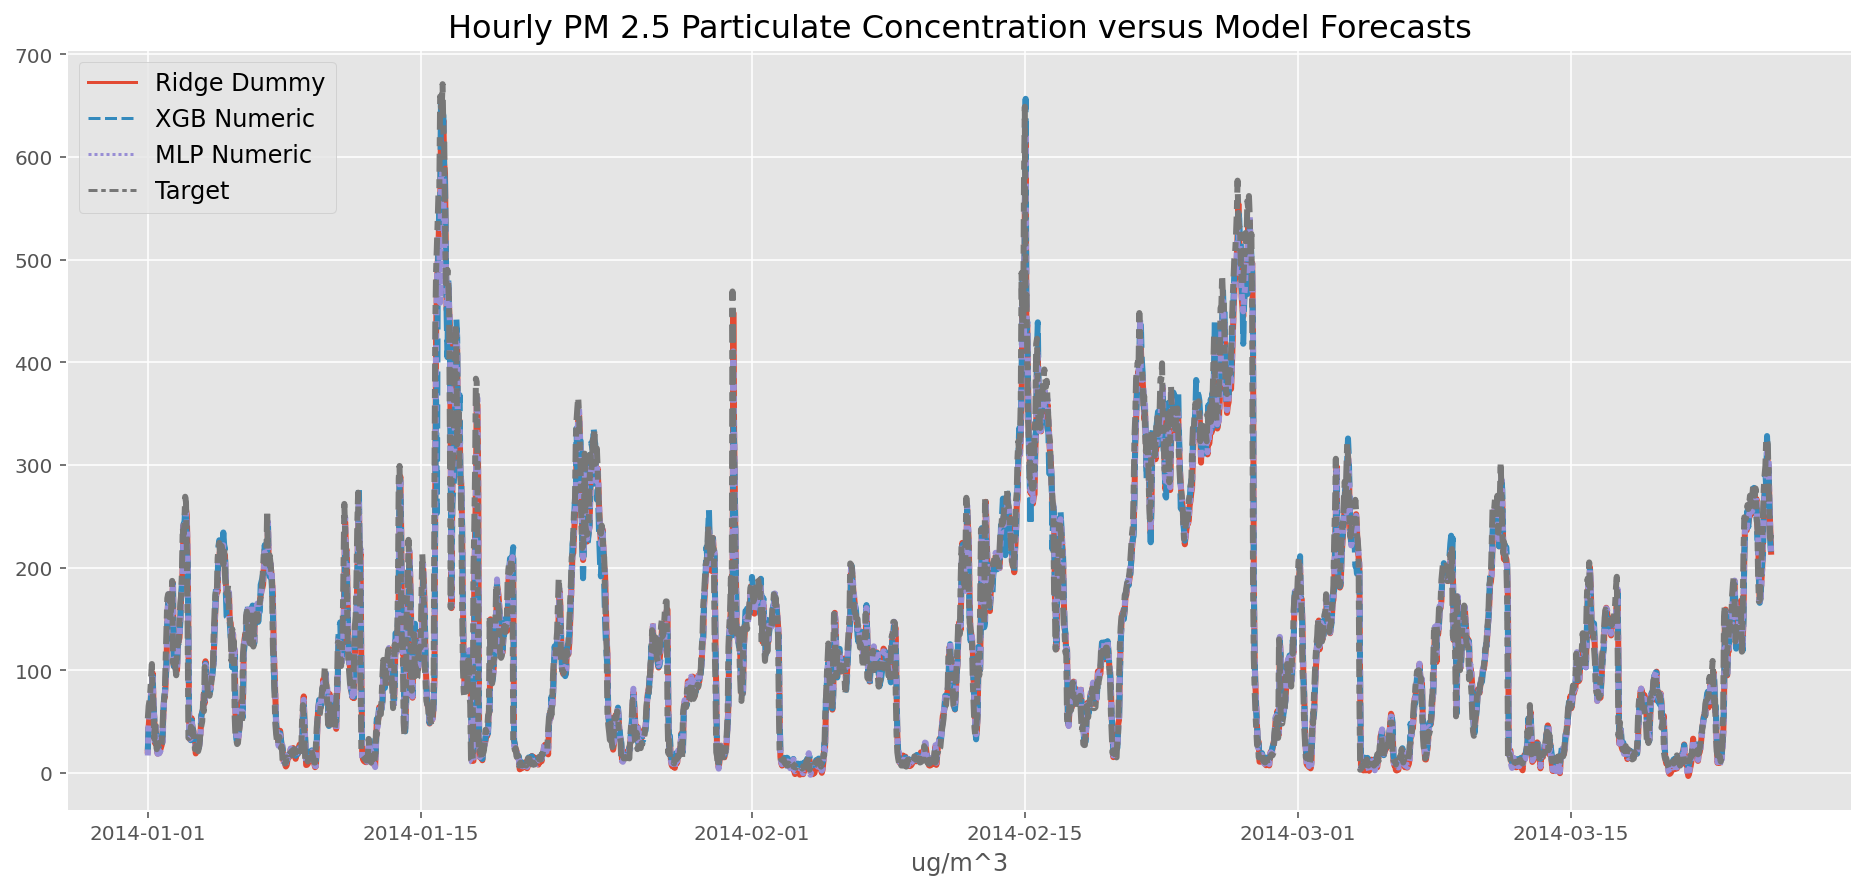

In [17]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['Ridge Dummy', 'XGB Numeric', 'MLP Numeric', 'Target']].iloc[:2000],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly PM 2.5 Particulate Concentration versus Model Forecasts', fontsize=16)
plt.xlabel('ug/m^3', fontsize=12);

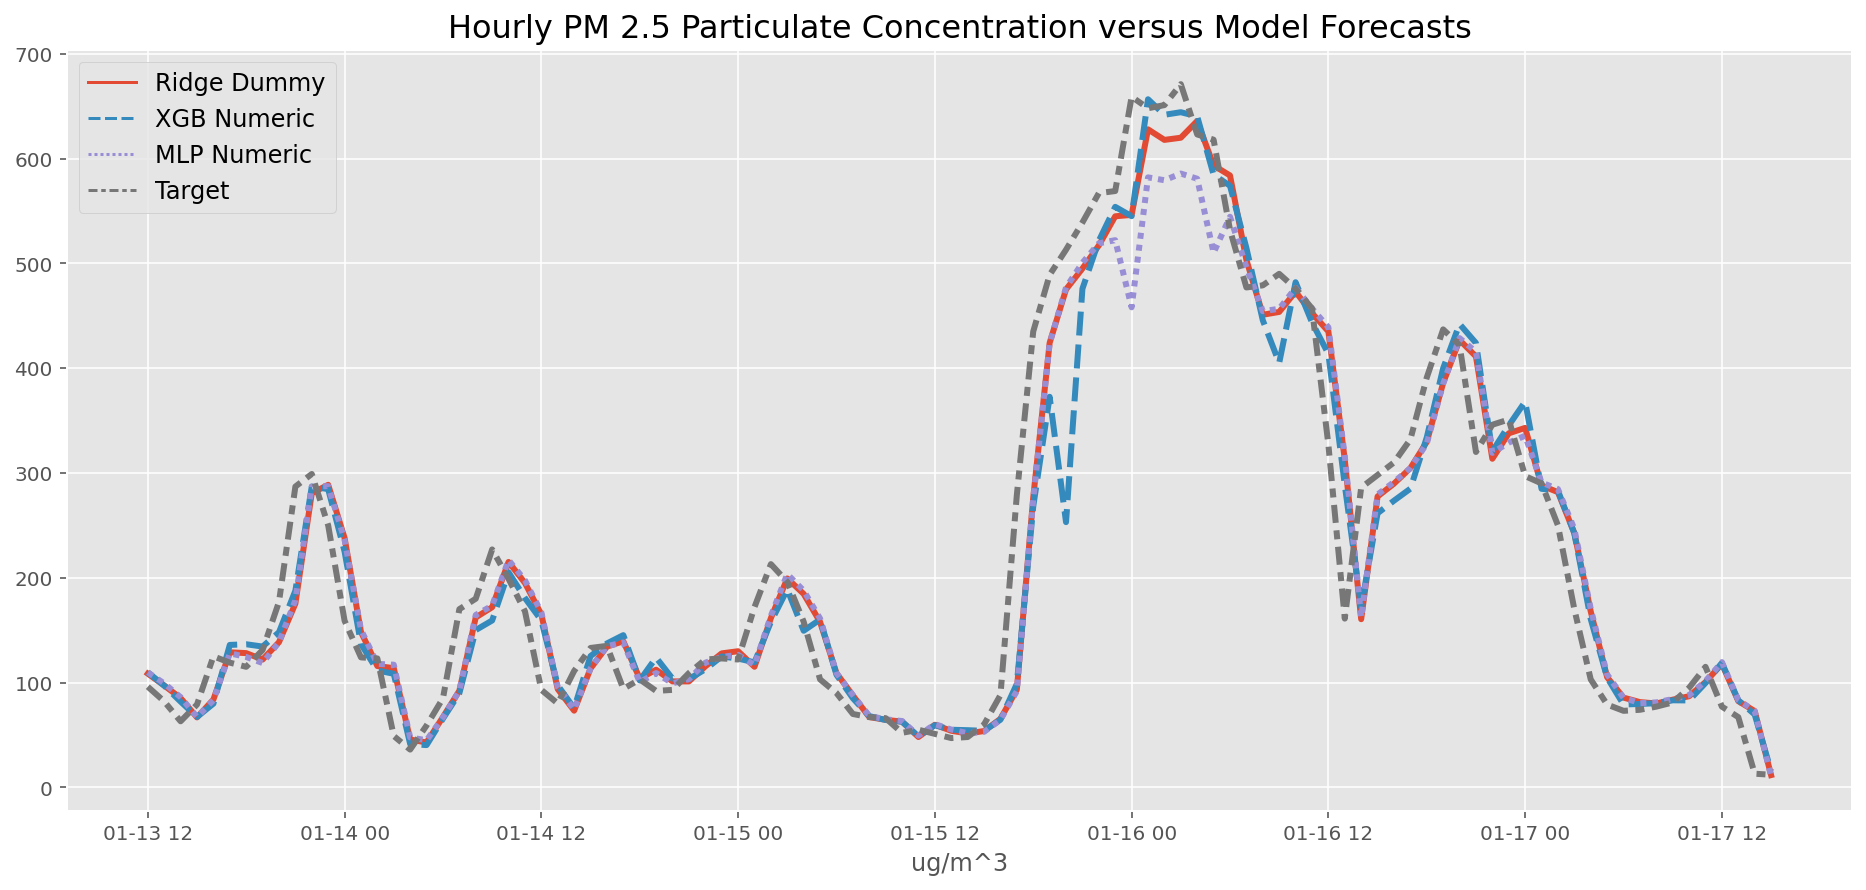

In [18]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['Ridge Dummy', 'XGB Numeric', 'MLP Numeric', 'Target']].iloc[300:400], 
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly PM 2.5 Particulate Concentration versus Model Forecasts', fontsize=16)
plt.xlabel('ug/m^3', fontsize=12);

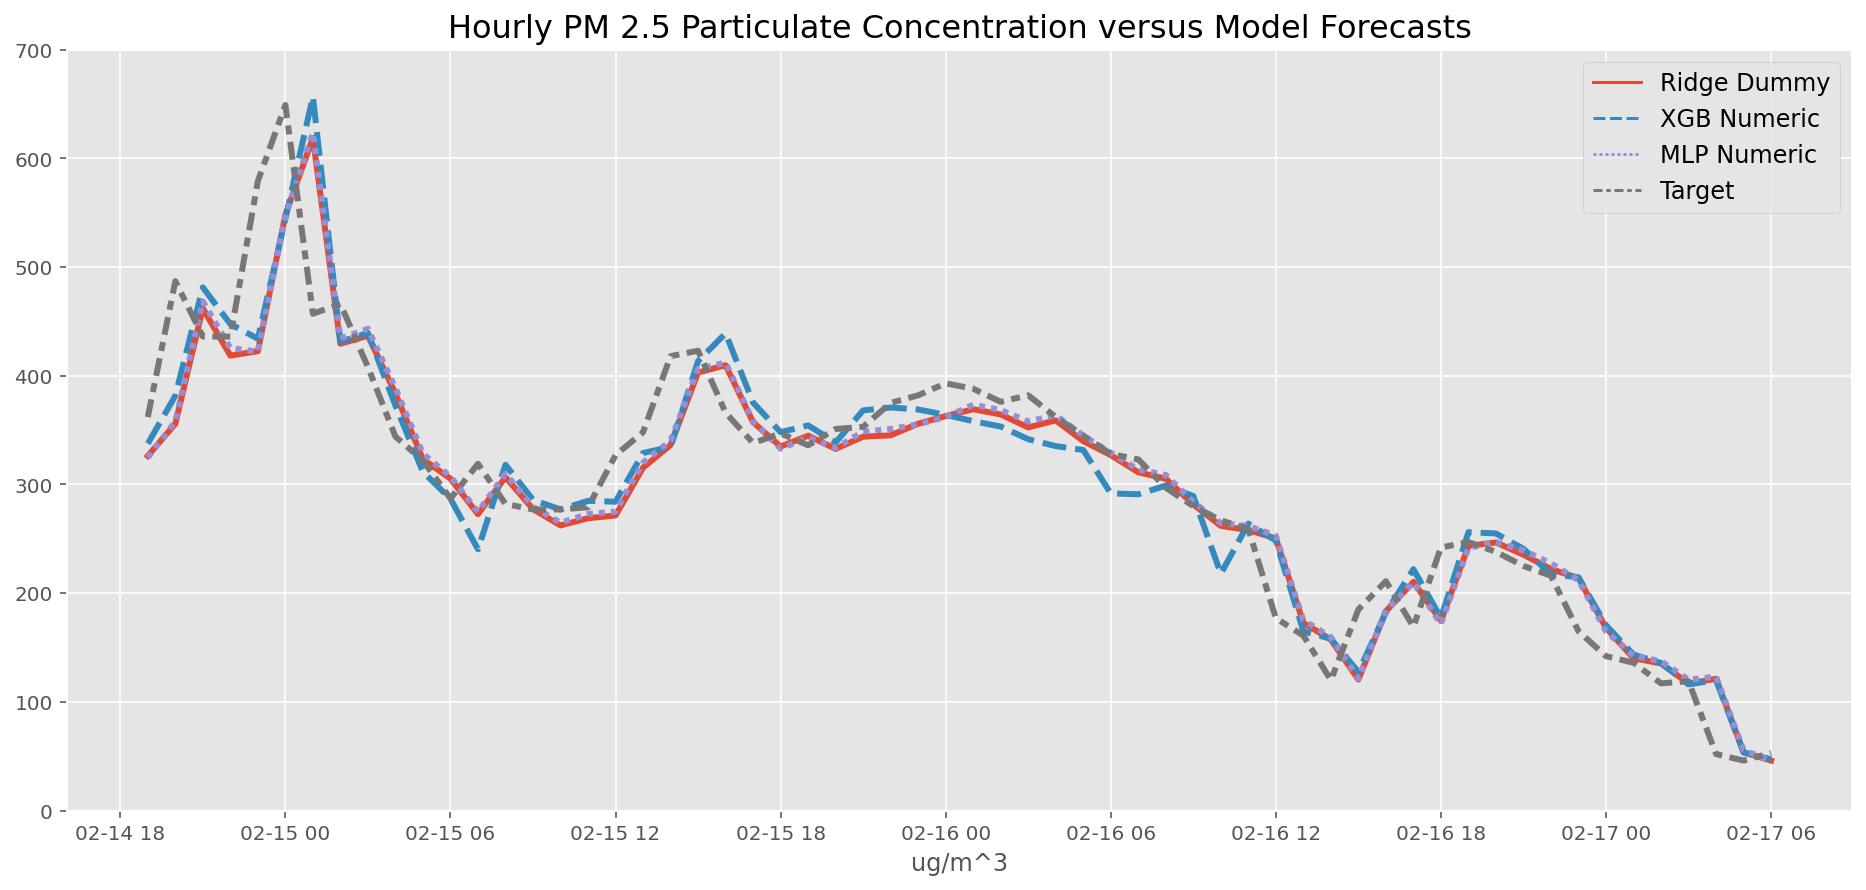

In [19]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['Ridge Dummy', 'XGB Numeric', 'MLP Numeric', 'Target']].iloc[1075:1135],
             ax=ax, linewidth=3)
ax.set(ylim=(0, 700))

plt.legend(loc='upper right', fontsize=12)
plt.title('Hourly PM 2.5 Particulate Concentration versus Model Forecasts', fontsize=16)
plt.xlabel('ug/m^3', fontsize=12);

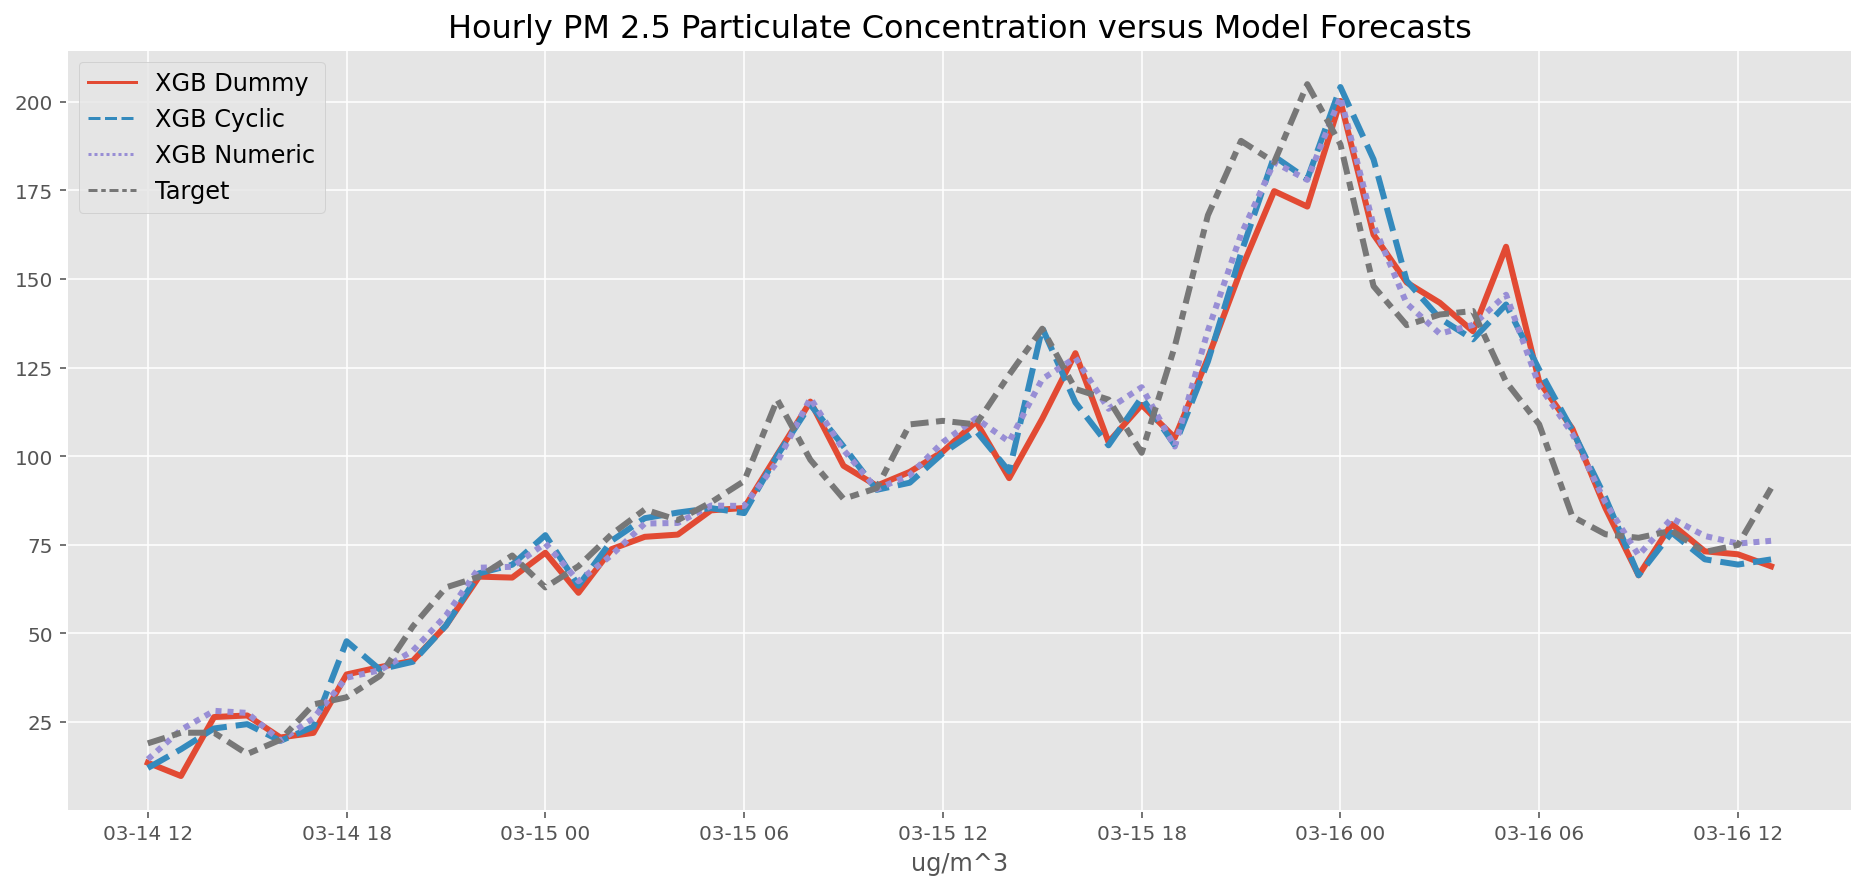

In [20]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['XGB Dummy', 'XGB Cyclic', 'XGB Numeric', 'Target']].iloc[1740:1790],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly PM 2.5 Particulate Concentration versus Model Forecasts', fontsize=16)
plt.xlabel('ug/m^3', fontsize=12);

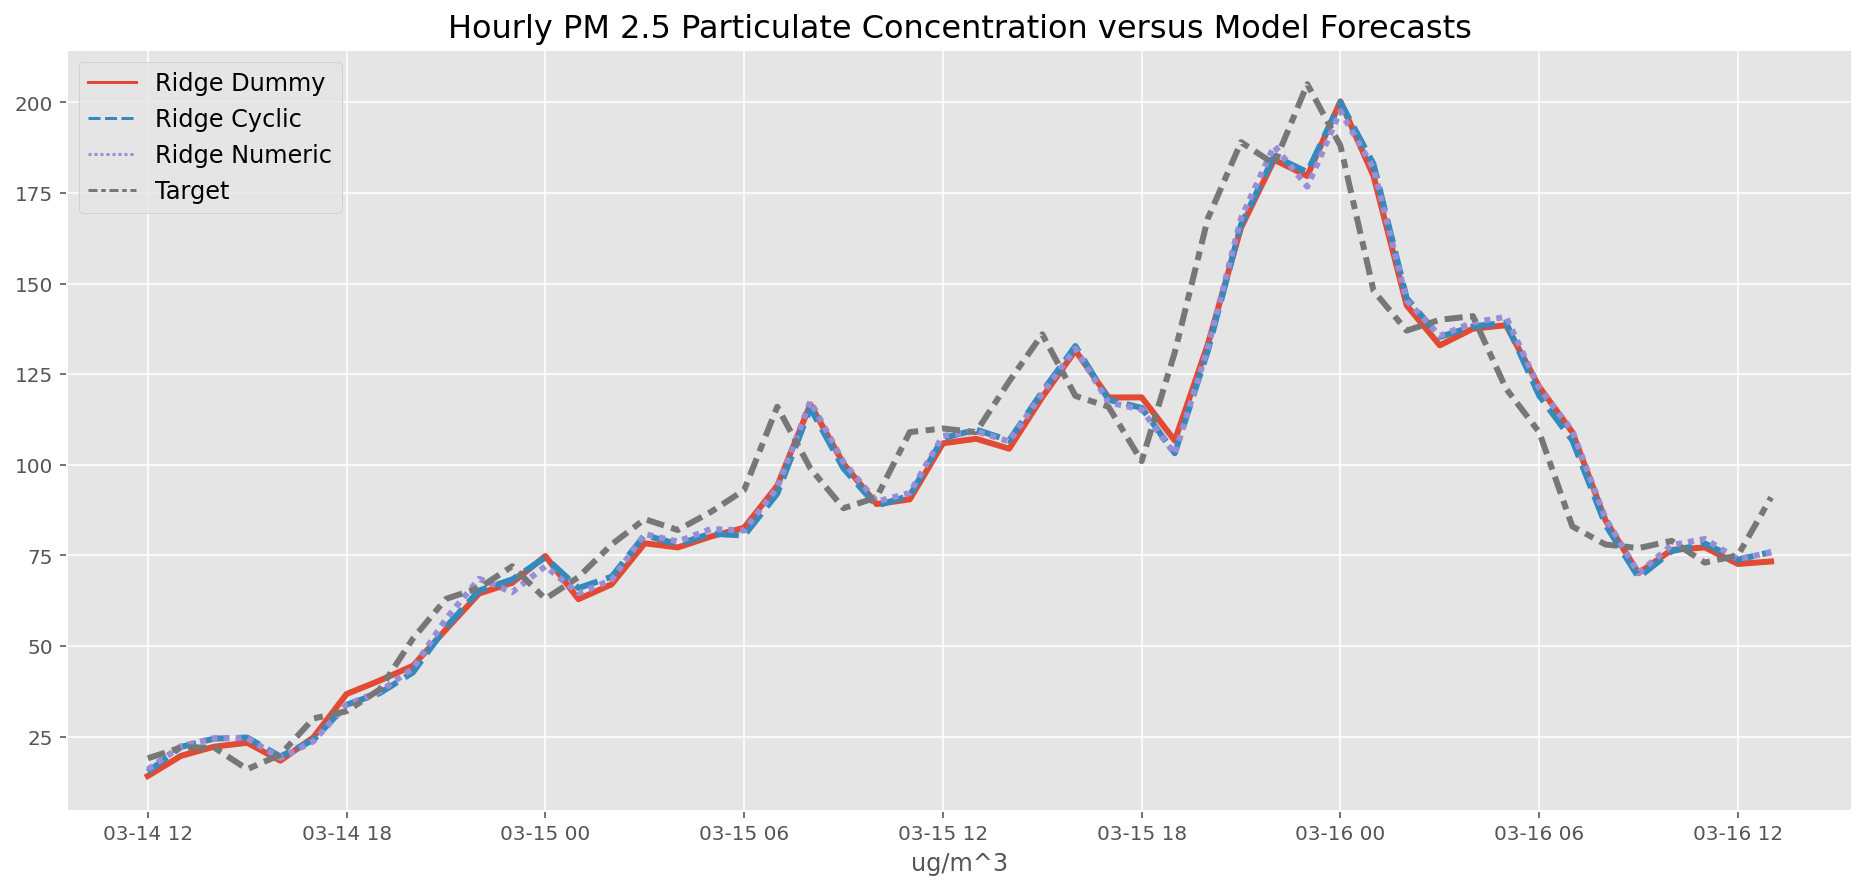

In [21]:
# Model predictions on test holdout data
fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(data=df[['Ridge Dummy', 'Ridge Cyclic', 'Ridge Numeric', 'Target']].iloc[1740:1790],
             ax=ax, linewidth=3)
plt.legend(loc='upper left', fontsize=12)
plt.title('Hourly PM 2.5 Particulate Concentration versus Model Forecasts', fontsize=16)
plt.xlabel('ug/m^3', fontsize=12);

# Model Predictions vs True Values

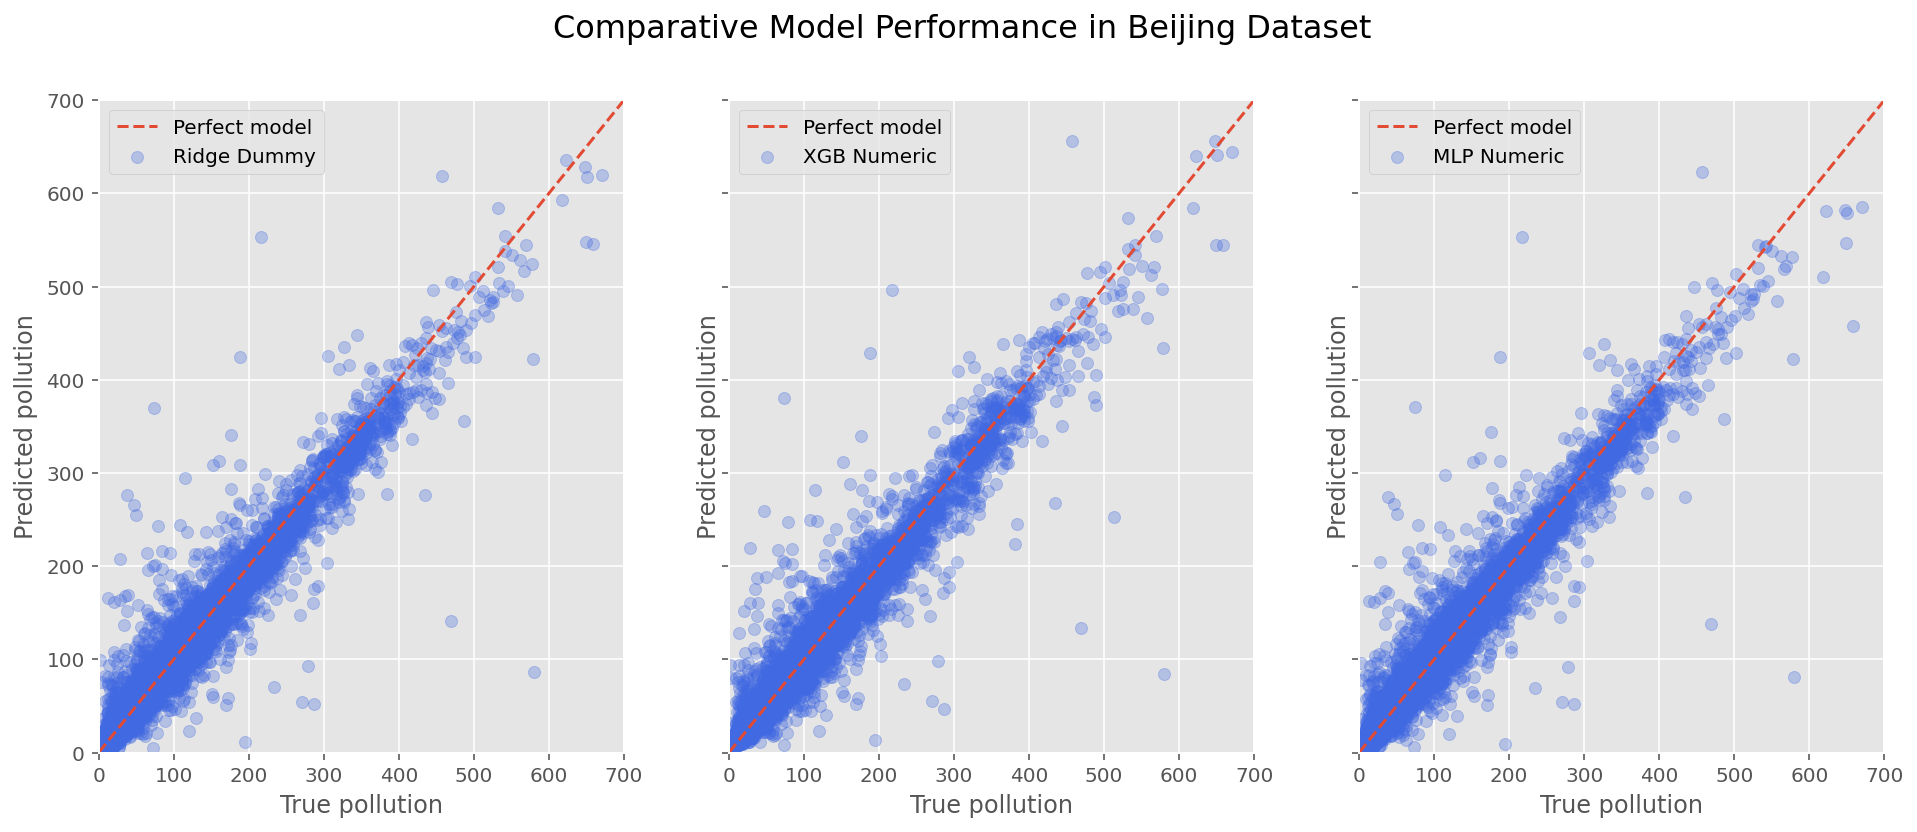

In [22]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.suptitle("Comparative Model Performance in Beijing Dataset", fontsize=16)
predictions = [
    df['Ridge Dummy'].to_list(),
    df['XGB Numeric'].to_list(),
    df['MLP Numeric'].to_list(),
]
labels = [
    "Ridge Dummy",
    "XGB Numeric",
    "MLP Numeric",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(df.Target.to_list(), pred, alpha=0.3, c='royalblue', label=label)
    ax.plot([0, 700], [0, 700], "--", label="Perfect model")
    ax.set(
        xlim=(0, 700),
        ylim=(0, 700),
        xlabel="True pollution",
        ylabel="Predicted pollution",
    )
    ax.legend()

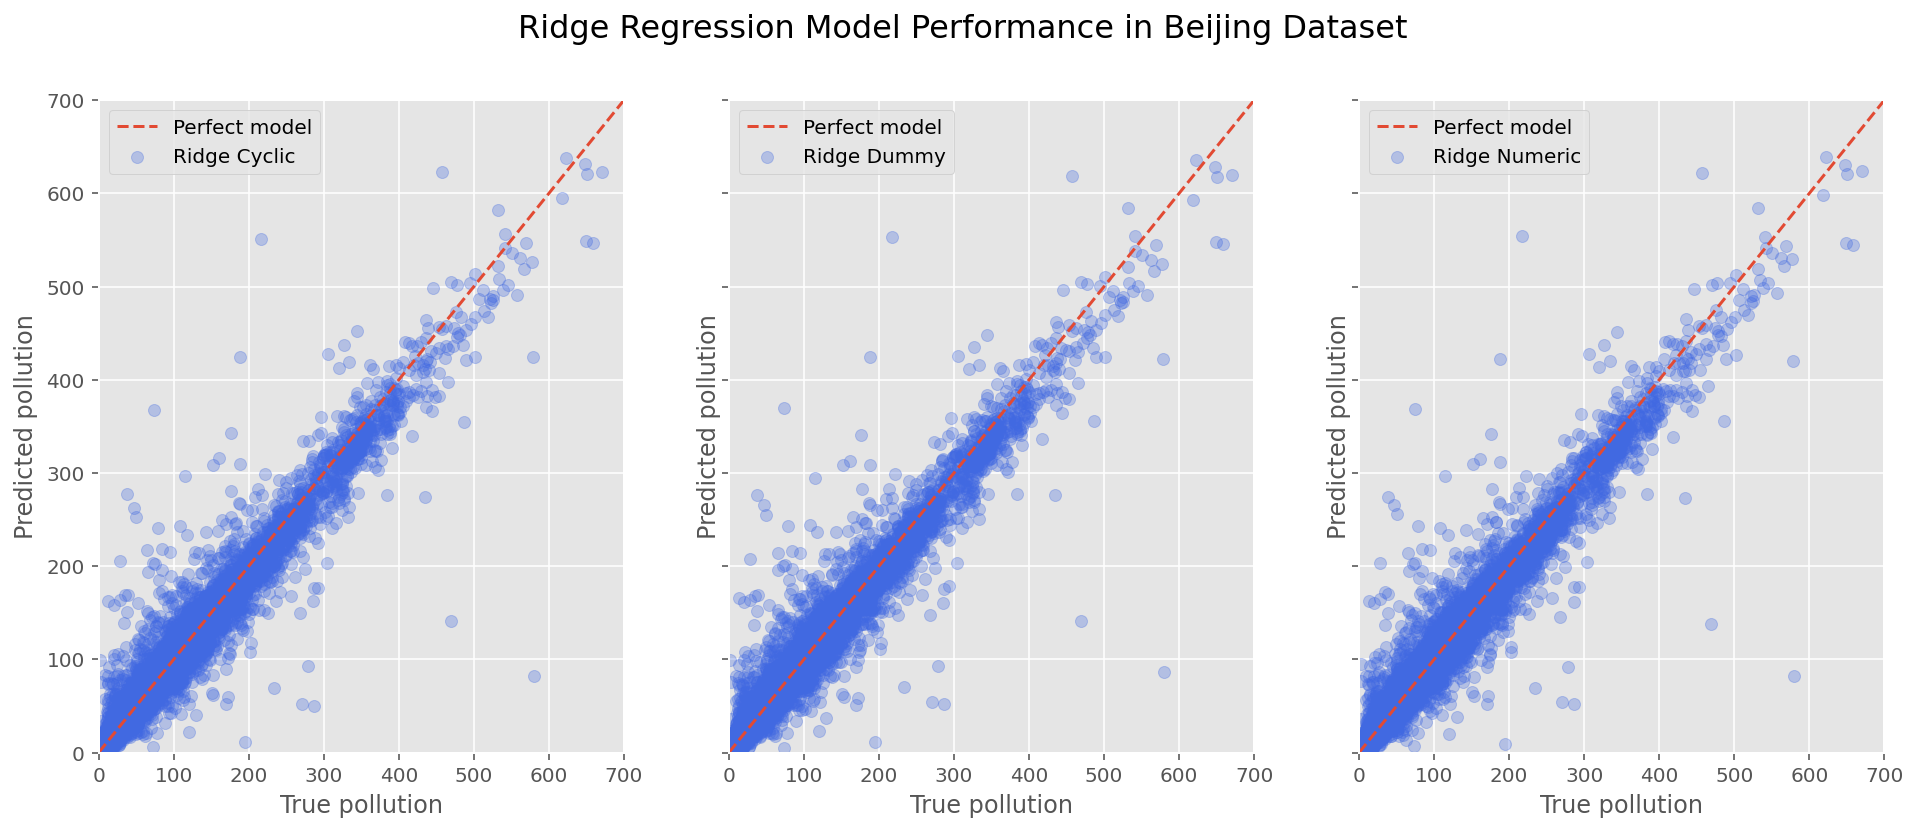

In [23]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.suptitle("Ridge Regression Model Performance in Beijing Dataset", fontsize=16)
predictions = [
    df['Ridge Cyclic'].to_list(),
    df['Ridge Dummy'].to_list(),
    df['Ridge Numeric'].to_list(),
]
labels = [
    "Ridge Cyclic",
    "Ridge Dummy",
    "Ridge Numeric",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(df.Target.to_list(), pred, alpha=0.3, c='royalblue', label=label)
    ax.plot([0, 700], [0, 700], "--", label="Perfect model")
    ax.set(
        xlim=(0, 700),
        ylim=(0, 700),
        xlabel="True pollution",
        ylabel="Predicted pollution",
    )
    ax.legend()

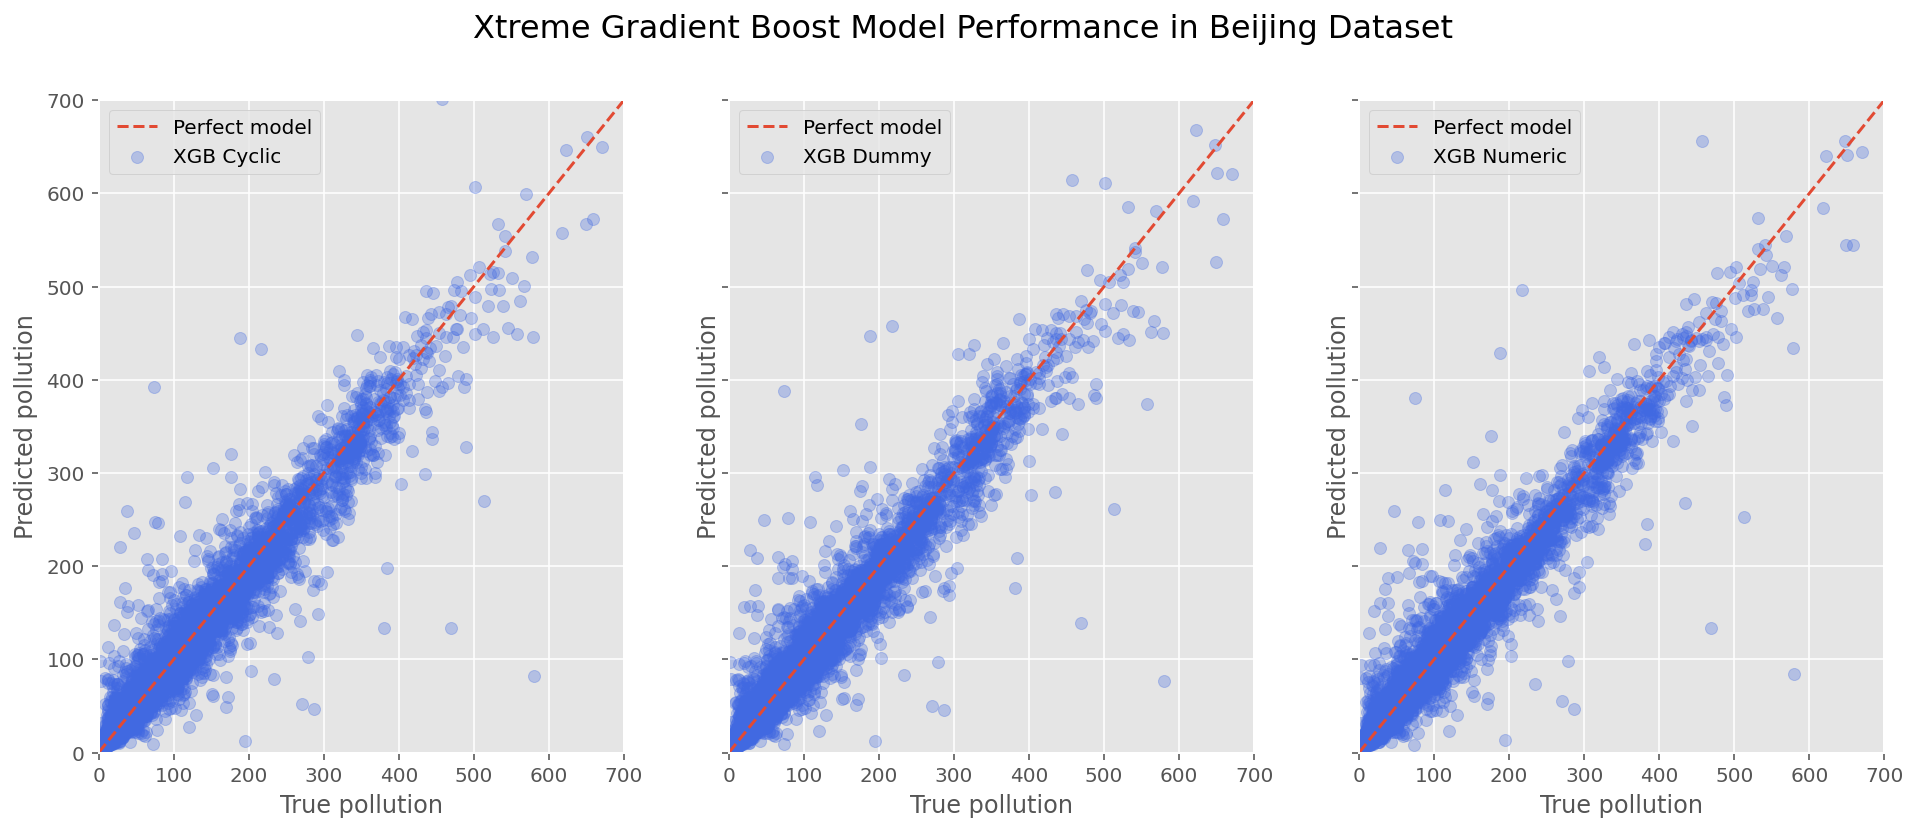

In [24]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.suptitle("Xtreme Gradient Boost Model Performance in Beijing Dataset", fontsize=16)
predictions = [
    df['XGB Cyclic'].to_list(),
    df['XGB Dummy'].to_list(),
    df['XGB Numeric'].to_list(),
]
labels = [
    "XGB Cyclic",
    "XGB Dummy",
    "XGB Numeric",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(df.Target.to_list(), pred, alpha=0.3, c='royalblue', label=label)
    ax.plot([0, 700], [0, 700], "--", label="Perfect model")
    ax.set(
        xlim=(0, 700),
        ylim=(0, 700),
        xlabel="True pollution",
        ylabel="Predicted pollution",
    )
    ax.legend()

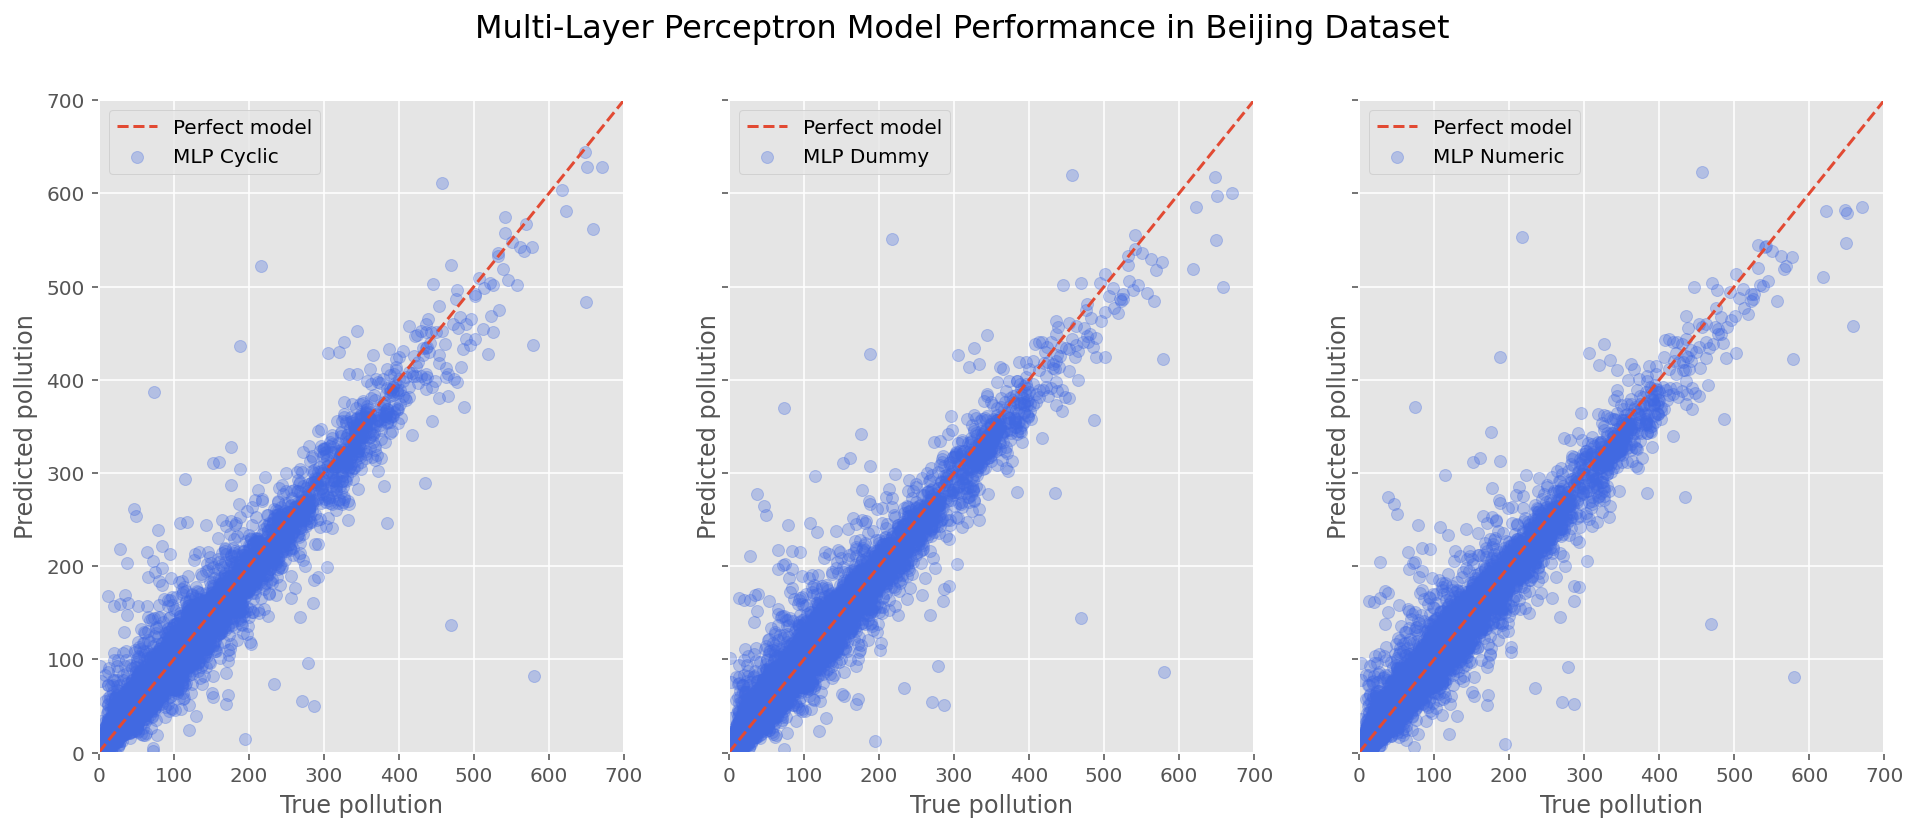

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)
fig.suptitle("Multi-Layer Perceptron Model Performance in Beijing Dataset", fontsize=16)
predictions = [
    df['MLP Cyclic'].to_list(),
    df['MLP Dummy'].to_list(),
    df['MLP Numeric'].to_list(),
]
labels = [
    "MLP Cyclic",
    "MLP Dummy",
    "MLP Numeric",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(df.Target.to_list(), pred, alpha=0.3, c='royalblue', label=label)
    ax.plot([0, 700], [0, 700], "--", label="Perfect model")
    ax.set(
        xlim=(0, 700),
        ylim=(0, 700),
        xlabel="True pollution",
        ylabel="Predicted pollution",
    )
    ax.legend()